# 기계학습 및 실습 2024년 2학기 중간과제

## 타이타닉 데이터셋 분석 

인공지능융합학부 안정빈(2020100381)

[1장 데이터 불러오기](##기초-데이터-분석)

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['font.family'] = 'Malgun Gothic'

df=pd.read_csv("./data/train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Name       891 non-null    object  
 3   Sex        891 non-null    object  
 4   Age        714 non-null    float64 
 5   SibSp      891 non-null    int64   
 6   Parch      891 non-null    int64   
 7   Ticket     891 non-null    object  
 8   Fare       891 non-null    float64 
 9   Cabin      204 non-null    object  
 10  Embarked   889 non-null    object  
 11  Age_group  713 non-null    category
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 84.8+ KB


In [127]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
Age_group    178
dtype: int64

Age, Cabin, Embarked 변수에 결측치가 존재하는 것을 알 수 있다. 
그 외 변수에는 결측치가 존재하지 않는다.

In [85]:
df.shape

(891, 11)

In [86]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


[2장 기초 데이터 분석](##기초-데이터-분석)

In [87]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


전체 인원 수: 891
생존 인원 수: 342
사망 인원 수: 549


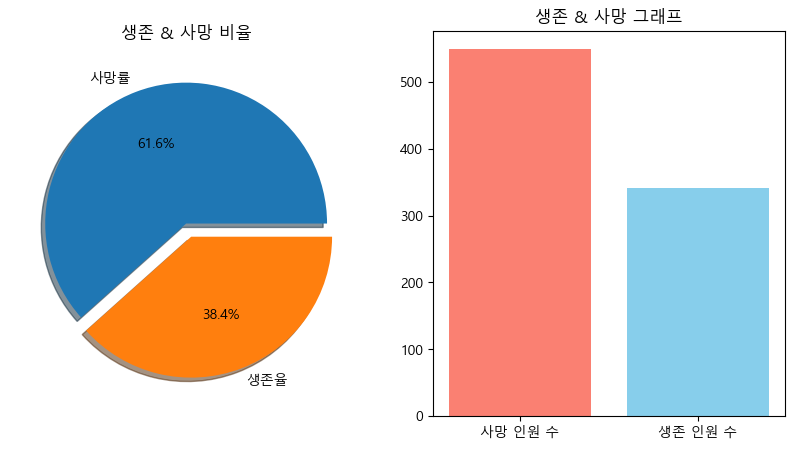

In [100]:
survive=df[df['Survived'] == 1]['Survived'].count()
death=df[df['Survived'] == 0]['Survived'].count()
values=[death,survive]
categories=['사망 인원 수','생존 인원 수']
print("전체 인원 수:", df['Survived'].count())
print("생존 인원 수:", survive)
print("사망 인원 수:", death)


f,ax=plt.subplots(1,2,figsize=(10,5))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=['사망률', '생존율'],ax=ax[0],shadow=True)
ax[0].set_title('생존 & 사망 비율')
ax[0].set_ylabel('')

ax[1].bar(categories, values ,color=['salmon', 'skyblue'])
ax[1].set_title('생존 & 사망 그래프')

plt.show()

전체 탑승객 891명 중, 생존 인원은 342, 사망 인원은 549명이다. 
전체 탑승객 중 61.6%가 사망했고, 38.4%만이 생존하였다. 
이 생존 확률을 기준으로, 어떤 상황에서 생존률이 높고 낮은지 판단할 수 있다.

In [120]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

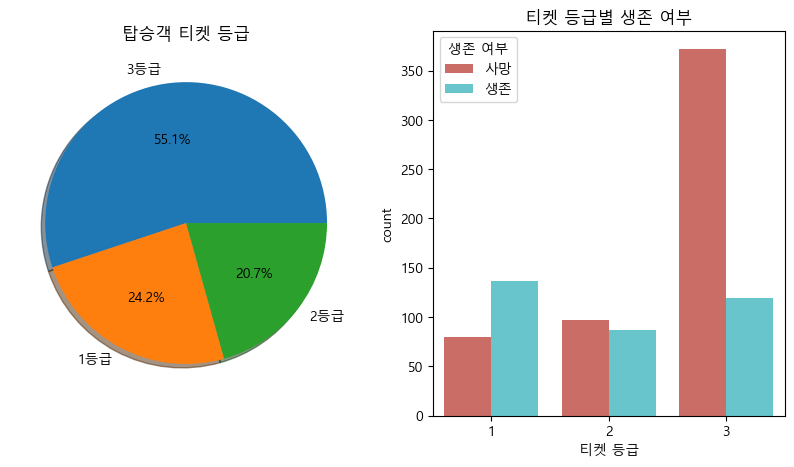

In [118]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',labels=['3등급', '1등급','2등급'],ax=ax[0],shadow=True)
ax[0].set_title('탑승객 티켓 등급')
ax[0].set_ylabel('')

ax[1]=sns.countplot(data=df, x="Pclass", palette='hls', hue='Survived')
ax[1].set_title('티켓 등급별 생존 여부')
ax[1].set_xlabel('티켓 등급')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')


1등급 탑승객의 비율은 24.2%, 2등급 탑승객의 비율은 20.7%, 3등급 탑승객의 비율은 55.1%로 절반 이상의 승객이 3등급칸을 이용하였다.

1등급 탑승객의 경우, 생존확률이 70%정도 되지만, 2등 탑승객의 경우 생존확률이 50%에 못 미친다. 그럼에도 1,2등급 승객은 전체 생존률인 38.4%보다 높은 생존률을 보이고 있다.

3등급 탑승객의 경우, 생존확률이 25%정도밖에 되지 않는다.

이를 통해, 1,2등급 승객을 우선으로 구조에 나섰음을 유추해볼 수 있다.

In [130]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

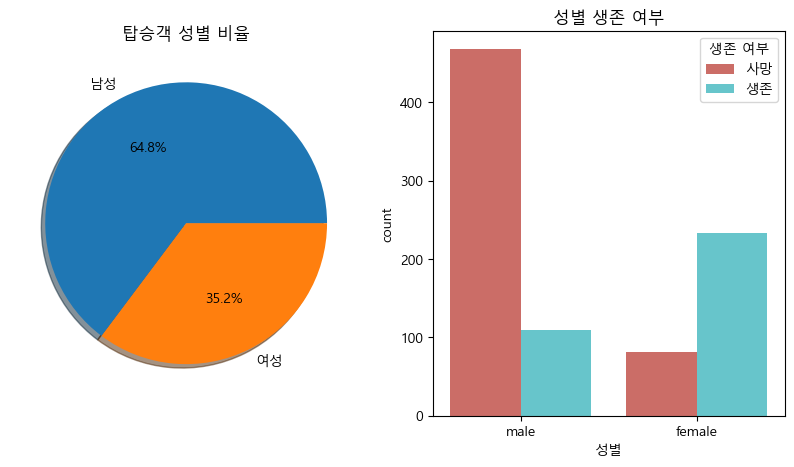

In [129]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%',labels=['남성', '여성'],ax=ax[0],shadow=True)
ax[0].set_title('탑승객 성별 비율')
ax[0].set_ylabel('')

ax[1]=sns.countplot(data=df, x="Sex", palette='hls', hue='Survived')
ax[1].set_title('성별 생존 여부')
ax[1].set_xlabel('성별')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

남성 탑승객의 비율은 64.8% 여성 탑승객의 비율은 35.2%로 남성 탑승객의 비율이 더 높은 것을 알 수 있다.

그러나 생존한 남성 탑승객수보다, 생존한 여성 탑승객의 수가 많을정도로, 남녀의 생존률이 큰 차이를 보이는 것을 알 수 있다.

남성의 생존률은 20%가 되지 않지만, 여성의 생존률은 70%이상인 것을 알 수 있다.

이를 통해 여성이 구조 우선순위였음을 유추해볼 수 있다.

탑승한 동반자 수(형제, 자매, 배우자)


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

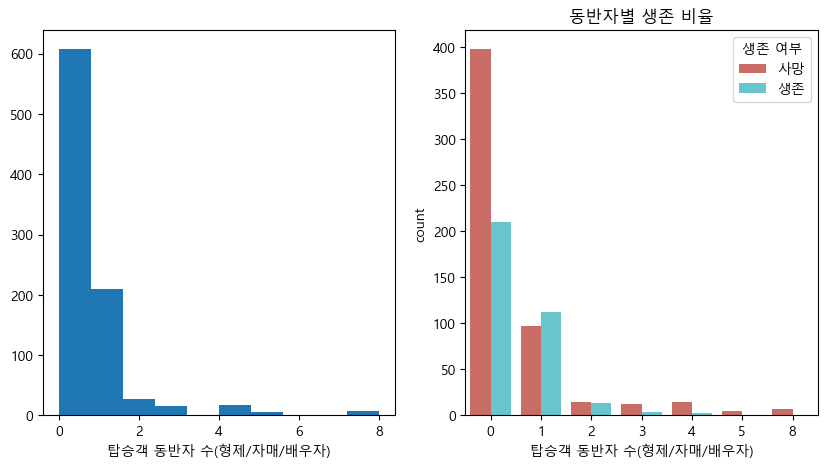

In [109]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['SibSp'])
ax[0].set_xlabel('탑승객 동반자 수(형제/자매/배우자)')

sns.countplot(data=df, x="SibSp", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('동반자별 생존 비율')
ax[1].set_xlabel('탑승객 동반자 수(형제/자매/배우자)')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

print("탑승한 동반자 수(형제, 자매, 배우자)")
df['SibSp'].value_counts()

891명의 승객중 608명의 승객이 형제,자매, 배우자 등과 탑승하지 않은 것으로 드러났다.
그 외 209명의 승객이 1명의 동반자와 탑승하였다. 즉 대부분의 승객들이 1명 이하의 형제, 자매, 배우자와 탑승한 것을 알 수 있다.

동반자 수와 생존률을 같이 확인해보면, 1,2명의 동반자가 있을 때 제일 높은 생존율을 보이는 것을 알 수 있다. 

표본이 작지만, 4,5,8명의 동반자 즉 많은 동반자와 탑승한 승객의 생존률이 매우 낮은 것을 알 수 있다. 

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

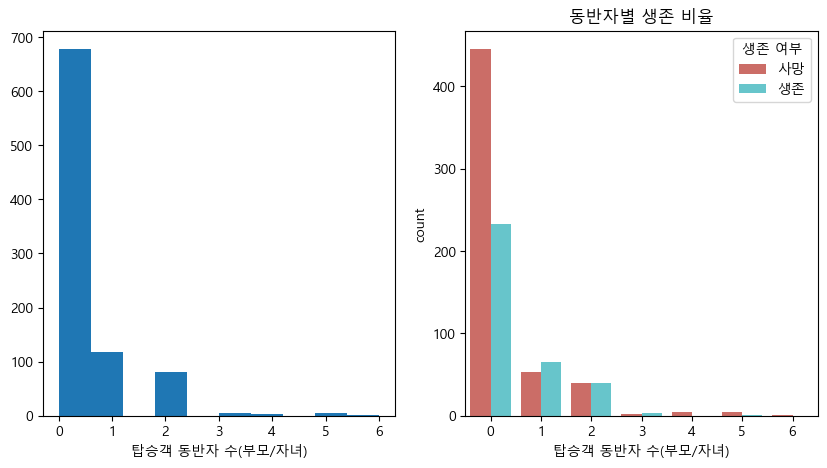

In [110]:
f,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df['Parch'])
ax[0].set_xlabel('탑승객 동반자 수(부모/자녀)')

sns.countplot(data=df, x="Parch", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('동반자별 생존 비율')
ax[1].set_xlabel('탑승객 동반자 수(부모/자녀)')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

df['Parch'].value_counts()

부모/자녀 없이 혼자 탑승한 고객이 678명으로 제일 많으며, 1명의 부모/자녀와 탑승한 고객이 118명, 2명의 부모/자녀와 탑승한 고객이 80명으로 대부분을 차지하고 있다.

위와 마찬가지로, 1명,2명의 부모/자녀와 탑승한 고객의 생존률이 50%이상임을 알 수 있다.
더 확인해봐야겠지만, 1,2명의 부모/자녀와 탑승한 고객들이 높은 등급의 객실에 머물렀을 가능성이 높거나, 구조 우선순위였음이 예상된다.

In [147]:
bins = range(0, 86, 5) 
labels = [f'{i}-{i+4}' for i in bins[:-1]] 

df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Age_group'].value_counts()

Age_group
20-24    114
25-29    106
30-34     95
15-19     86
35-39     72
40-44     48
45-49     41
0-4       40
50-54     32
5-9       22
10-14     16
55-59     16
60-64     15
70-74      6
65-69      4
80-84      1
75-79      0
Name: count, dtype: int64

C:\Users\jeongbin\AppData\Local\Temp\ipykernel_6584\2648788405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Age_group", palette='hls',ax=ax[0],legend=False)


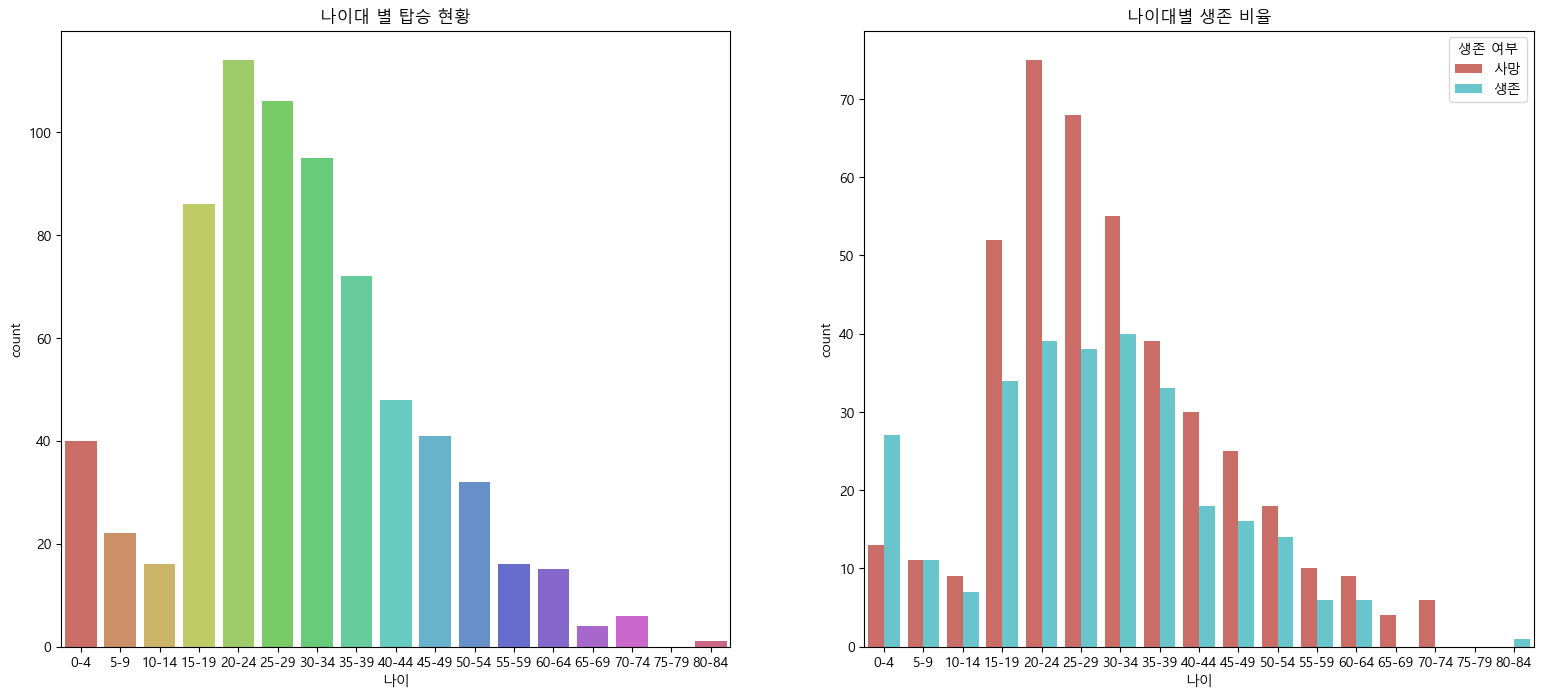

In [146]:
f,ax=plt.subplots(1,2,figsize=(19,8))
sns.countplot(data=df, x="Age_group", palette='hls',ax=ax[0],legend=False)
ax[0].set_title('나이대 별 탑승 현황')
ax[0].set_xlabel('나이')

sns.countplot(data=df, x="Age_group", palette='hls', hue='Survived',ax=ax[1])
ax[1].set_title('나이대별 생존 비율')
ax[1].set_xlabel('나이')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

15~34세 나이의 승객이 제일 많았음을 알 수 있다. 

나이대별 생존 그래프를 보면 14세 미만의 아이들의 생존률이 제일 높게 나타나고 있다. 특히 0~4세 유아들의 생존률은 66%이상으로 보인다. 어린 아이들을 우선적으로 구조했음을 예상해볼 수 있다. 

20~29세 사이의 승객들이 제일 많이 사망한 것을 알 수 있다. 또한 낮은 생존률을 보이고 있다




In [148]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

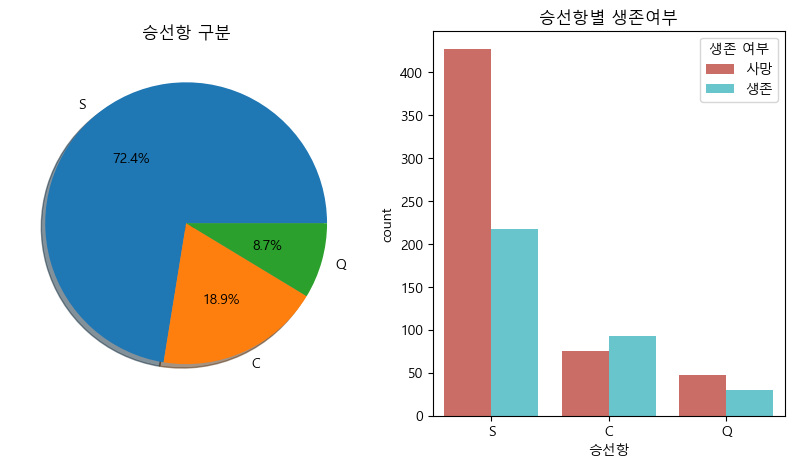

In [115]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title("승선항 구분")
ax[0].set_ylabel('')

ax[1]=sns.countplot(data=df, x="Embarked", palette='hls', hue='Survived')
ax[1].set_title('승선항별 생존여부')
ax[1].set_xlabel('승선항')
new_labels = ['사망', '생존']
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, new_labels, title='생존 여부')

'Southampton'에서 승선한 승객이 72.4%로 매우 높은 비율임을 알 수 있다. 그러나 다른 승선장에서 탑승한 승객들에 비해 낮은 생존률을 보이고 있다.

'Cherbourg'에서 승선한 승객은 18.9%로 50%가 넘는 생존률을 보이고 있다. 

## 2개의 변수를 고려하여 생존률 확인 

In [149]:
# 성별, 티켓 등급별 생존률 
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

<Figure size 1000x600 with 0 Axes>

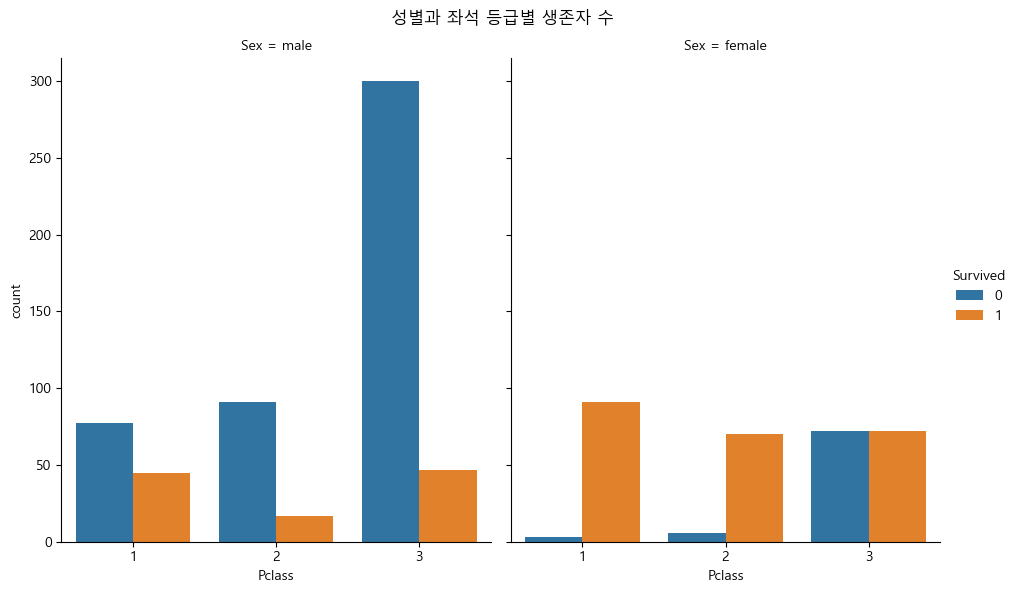

In [159]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='Pclass', hue='Survived', col='Sex', kind='count', height=6, aspect=0.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('성별과 좌석 등급별 생존자 수')
plt.show()

성별과 탑승석 등급을 이용해 더 자세히 생존률을 파악해보려고 한다. 

1 등급석과 2등급석에 탑승한 여성은 대부분 생존한 것을 확인할 수 있다. 

또한 3 등급석에 탑승한 여성들 역시 절반이 생존한 것을 확인할 수 있다. 

그에 비해 1등급석에 남자는 37%의 생존률로 전체 생존률보다, 조금 더 높은 생존률을 보인다. 

2,3등급석의 남성은 각각 16%, 14% 생존률로, 전체 생존률보다 매우 낮다. 

이를 통해 1,2 등급이 구조의 우선 순위였으며, 그 중 여성을 먼저 구조한 것을 확인할 수 있다. 

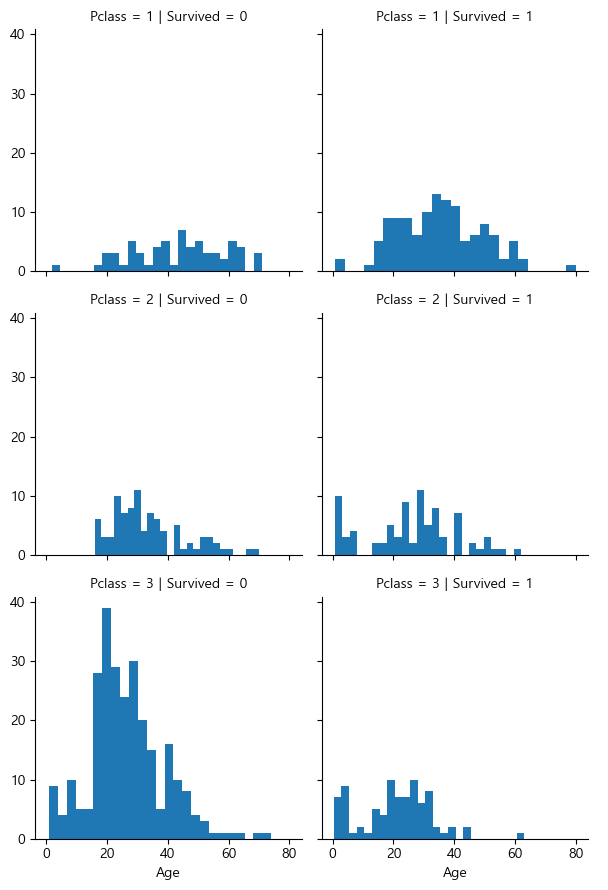

In [126]:
g = sns.FacetGrid(df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()